## Analyzing the Relationship Between Song Attributes and Streaming Count

### Introduction

Music plays a significant role in my life, sparking a deep interest in understanding the factors that contribute to a song's success. This project leverages data analysis to explore the characteristics that drive song popularity across major streaming platforms. By combining my passion for music with data science, I aim to uncover insights that could be valuable for artists, producers, and music enthusiasts alike. This project aims to explore what factors affect the number of streams a song gets by using the Most Streamed Spotyfy Songs 2023, which includes bpm, danceability, positivity, instrumentalness, speechiness, along with other descriptive variables.

In [183]:
# importing libraries
import kaggle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [184]:
kaggle.api.authenticate()

# download the dataset
kaggle.api.dataset_download_files('nelgiriyewithana/top-spotify-songs-2023', path = ".", unzip = True)

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023


In [185]:
csv = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
csv.to_csv('spotify-2023-utf8.csv', encoding='utf-8', index=False)

data = pd.read_csv('spotify-2023-utf8.csv')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [186]:
# total: 953 observations and 24 columns
data.shape

(953, 24)

In [187]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### Wrangling the dataset

The dataset was wrangled to fit the needs of this project. \
The selected variables are \
Explanatory variables: `bpm`, `danceability_%`, `valence_%`, `energy_%`, `acousticness_%`, `instrumentalness_%`, `liveness_%`, and `speechiness_%`\
Response variable: `streams`

In [188]:
music = data[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',  'speechiness_%']]
music.head(3)

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,141381703,125,80,89,83,31,0,8,4
1,133716286,92,71,61,74,7,0,10,4
2,140003974,138,51,32,53,17,0,31,6


In [189]:
music.dtypes

streams               object
bpm                    int64
danceability_%         int64
valence_%              int64
energy_%               int64
acousticness_%         int64
instrumentalness_%     int64
liveness_%             int64
speechiness_%          int64
dtype: object

The `streams` column was initially of type `object`, but it was converted to a numeric type to facilitate analysis.

In [190]:
music['streams'] = pd.to_numeric(music['streams'], errors = 'coerce')

music.dtypes

C:\Users\csh03\AppData\Local\Temp\ipykernel_15716\670273691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['streams'] = pd.to_numeric(music['streams'], errors = 'coerce')


streams               float64
bpm                     int64
danceability_%          int64
valence_%               int64
energy_%                int64
acousticness_%          int64
instrumentalness_%      int64
liveness_%              int64
speechiness_%           int64
dtype: object

In [191]:
# check if there are null values
music.isnull().sum()

streams               1
bpm                   0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [192]:
# drop roww with missing values
music = music.dropna()
music.isnull().sum()

streams               0
bpm                   0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

### Exploratory Data Analysis

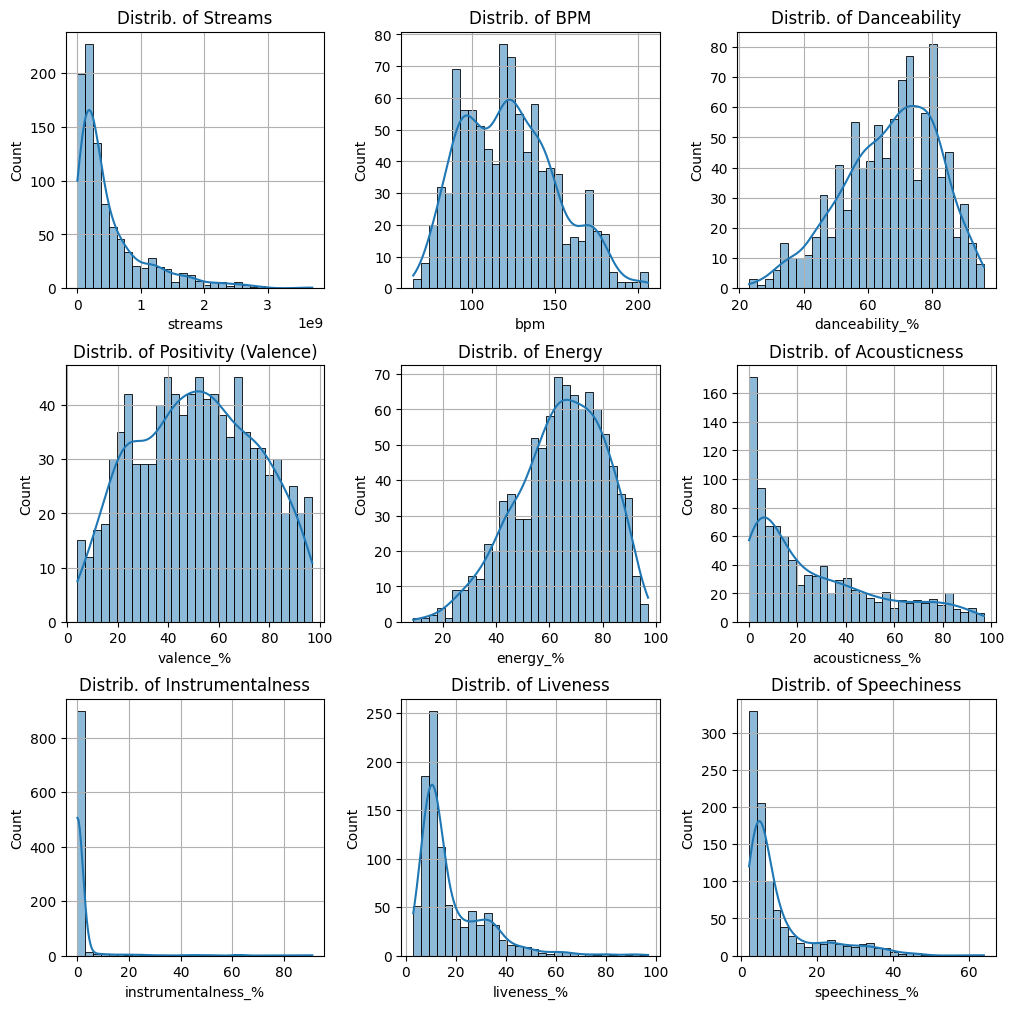

In [193]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1) # row 3, col 3, index 1
sns.histplot(music['streams'], bins = 30, kde=True)
plt.title('Distrib. of Streams')
plt.grid(True)


plt.subplot(3, 3, 2) # row 3, col 3, index 2
sns.histplot(music['bpm'], bins = 30, kde=True)
plt.title('Distrib. of BPM')
plt.grid(True)


plt.subplot(3, 3, 3) # row 3, col 3, index 3
sns.histplot(music['danceability_%'], bins = 30, kde=True)
plt.title('Distrib. of Danceability')
plt.grid(True)


plt.subplot(3, 3, 4) # row 3, col 3, index 4
sns.histplot(music['valence_%'], bins = 30, kde=True)
plt.title('Distrib. of Positivity (Valence)')
plt.grid(True)


plt.subplot(3, 3, 5) # row 3, col 3, index 5
sns.histplot(music['energy_%'], bins = 30, kde=True)
plt.title('Distrib. of Energy')
plt.grid(True)


plt.subplot(3, 3, 6) # row 3, col 3, index 6
sns.histplot(music['acousticness_%'], bins = 30, kde=True)
plt.title('Distrib. of Acousticness')
plt.grid(True)



plt.subplot(3, 3, 7) # row 3, col 3, index 7
sns.histplot(music['instrumentalness_%'], bins = 30, kde=True)
plt.title('Distrib. of Instrumentalness')
plt.grid(True)



plt.subplot(3, 3, 8) # row 3, col 3, index 8
sns.histplot(music['liveness_%'], bins = 30, kde=True)
plt.title('Distrib. of Liveness')
plt.grid(True)


plt.subplot(3, 3, 9) # row 3, col 3, index 9
sns.histplot(music['speechiness_%'], bins = 30, kde=True)
plt.title('Distrib. of Speechiness')
plt.grid(True)


plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()


The histograms for `streams`, `acousticness`, `instrumentalness`, `liveness`, and `speechiness` show a right-skewed distrubition. `Danceability` and `energy` show a slight left-skewed distribution. The distribution of `valence` is bell-shaped, and the distribution of `bpm` has a binomial distribution.\
To address the right-skewed nature of the variables `streams`, `acousticness`, `liveness`, and `speechiness`, log transformations was applied (`instrumentalness` was skipped due to its near-zero values, which could lead to `-inf` values). This transformation can help to normalize these distributions by compressing the larger values and spreading out the smaller ones, making patterns in the data more evident and improving the performance of subsquent analyses.

In [194]:
# apply log transformations to right-skewed variables
music['log_streams'] = np.log(music['streams'])
music['log_acousticness'] = np.log(music['acousticness_%'])
music['log_liveness'] = np.log(music['liveness_%'])
music['log_speechiness'] = np.log(music['speechiness_%'])

# reorder columns and remove the streams column
music = music[['log_streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'log_acousticness', 'instrumentalness_%', 'log_liveness',  'log_speechiness']]

# replace -inf values with NaN
music.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows with any NaN values
music.dropna(inplace=True)

music.head(3)

c:\Downloaded Programs\Visual Studio Code_Python\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,log_streams,bpm,danceability_%,valence_%,energy_%,log_acousticness,instrumentalness_%,log_liveness,log_speechiness
0,18.766974,125,80,89,83,3.433987,0,2.079442,1.386294
1,18.711231,92,71,61,74,1.945910,0,2.302585,1.386294
2,18.757181,138,51,32,53,2.833213,0,3.433987,1.791759


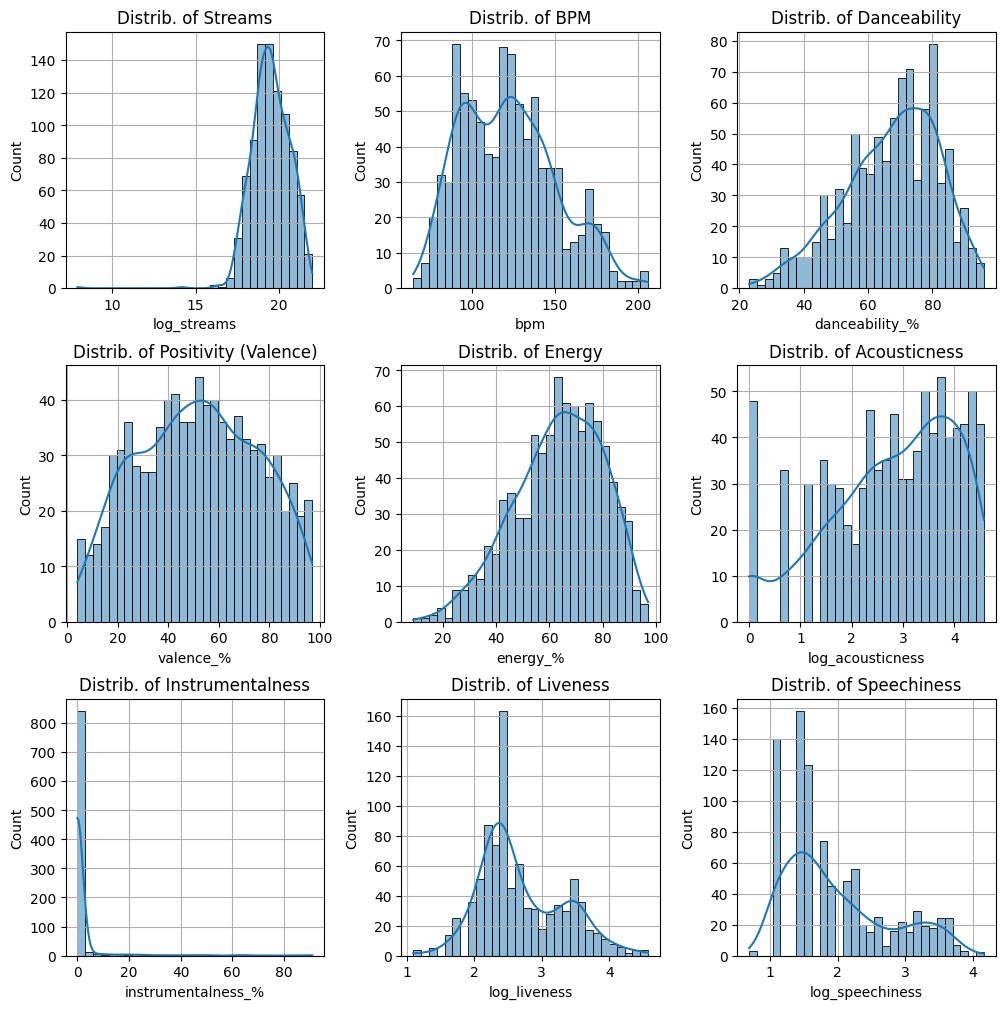

In [195]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1) # row 3, col 3, index 1
sns.histplot(music['log_streams'], bins = 30, kde=True)
plt.title('Distrib. of Streams')
plt.grid(True)


plt.subplot(3, 3, 2) # row 3, col 3, index 2
sns.histplot(music['bpm'], bins = 30, kde=True)
plt.title('Distrib. of BPM')
plt.grid(True)


plt.subplot(3, 3, 3) # row 3, col 3, index 3
sns.histplot(music['danceability_%'], bins = 30, kde=True)
plt.title('Distrib. of Danceability')
plt.grid(True)


plt.subplot(3, 3, 4) # row 3, col 3, index 4
sns.histplot(music['valence_%'], bins = 30, kde=True)
plt.title('Distrib. of Positivity (Valence)')
plt.grid(True)


plt.subplot(3, 3, 5) # row 3, col 3, index 5
sns.histplot(music['energy_%'], bins = 30, kde=True)
plt.title('Distrib. of Energy')
plt.grid(True)


plt.subplot(3, 3, 6) # row 3, col 3, index 6
sns.histplot(music['log_acousticness'], bins = 30, kde=True)
plt.title('Distrib. of Acousticness')
plt.grid(True)



plt.subplot(3, 3, 7) # row 3, col 3, index 7
sns.histplot(music['instrumentalness_%'], bins = 30, kde=True)
plt.title('Distrib. of Instrumentalness')
plt.grid(True)



plt.subplot(3, 3, 8) # row 3, col 3, index 8
sns.histplot(music['log_liveness'], bins = 30, kde=True)
plt.title('Distrib. of Liveness')
plt.grid(True)


plt.subplot(3, 3, 9) # row 3, col 3, index 9
sns.histplot(music['log_speechiness'], bins = 30, kde=True)
plt.title('Distrib. of Speechiness')
plt.grid(True)


plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()


After the transformation, the histograms for `streams` and `acuousticness` shows a left-skewed distribution. `Liveness` and `speechiness` show a binomial distribution. 

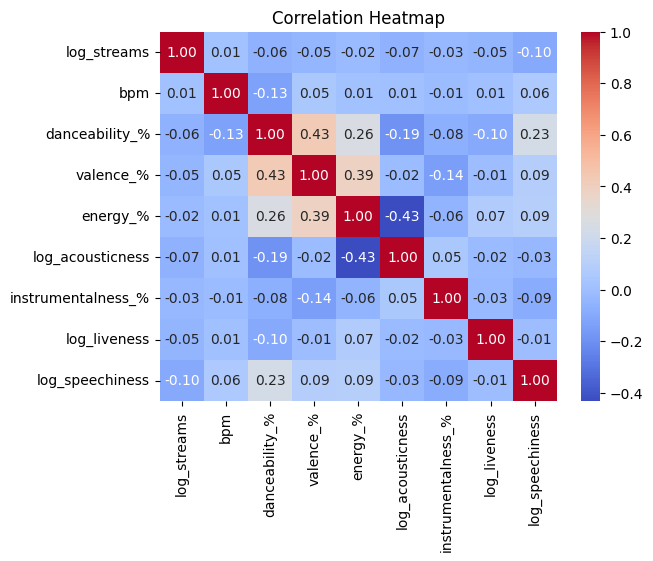

In [196]:
correlation_matrix = music.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Examining the correlation heatmap, `valence_%` & `danceability_%`, and `energy_%` & `valence_%` show a moderate positive correlation. On the other hand, `log_acousticness` and `energy_%` show a moedrate negative correlation. The remaining correlations exhibit either a weak negative or positive relationship, or no linear relationship.

### Model

The Lasso regression model was employed to predict the `log_streams` variable.

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
train = music.drop(['log_streams'], axis='columns')
test = music['log_streams']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=1)

In [200]:
from sklearn.preprocessing import StandardScaler

In [201]:
scaler = StandardScaler()

In [202]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [203]:
from sklearn.linear_model import Lasso

In [204]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [205]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [206]:
y_pred = lasso.predict(X_test)

In [207]:
mean_absolute_error(y_test, y_pred)

np.float64(0.8361221744788866)

In [208]:
mean_squared_error(y_test, y_pred)

np.float64(1.1036735360204104)

In [209]:
r2_score(y_test, y_pred)

-0.0002659438152383675

- Mean Absolute Error (MAE): 0.836
- Mean Squared Error (MSE): 1.104
- R<sup>2</sup>: -0.0003

MAE of 0.836 suggests that, on average, the model's predictions are off by about 0.836 units from the actual values. MSE of 1.104 indicates that the average squared difference between the predicted and actual values is 1.104, which is a measure of how spread out these error are. R<sup>2</sup> of -0.0003 no better than a horizontal line. The negative R<sup>2</sup> means that the model is not capturing any meaningful variance in the data.

In [210]:
praram_grid = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [211]:
from sklearn.model_selection import GridSearchCV

In [212]:
lasso_cv = GridSearchCV(lasso, praram_grid, cv = 3, n_jobs=-1)

In [213]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [214]:
y_pred2 = lasso_cv.predict(X_test)

In [215]:
mean_absolute_error(y_test, y_pred2)

np.float64(0.8361221744788866)

In [216]:
mean_squared_error(y_test, y_pred2)

np.float64(1.1036735360204104)

In [217]:
r2_score(y_test, y_pred2)

-0.0002659438152383675

In [218]:
lasso_cv.best_estimator_

Lasso(alpha=1)

After perfoming Grid Search Cross-Validation, the model did not improve or change.

In [219]:
lasso3 = Lasso(alpha=1)

In [220]:
lasso3.fit(X_train, y_train)

Lasso(alpha=1)

In [221]:
lasso3.intercept_

np.float64(19.507591731303055)

In [222]:
lasso3.coef_

array([-0., -0., -0., -0., -0., -0., -0., -0.])

In [223]:
feature_names = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'log_acousticness', 'instrumentalness_%', 'log_liveness',  'log_speechiness']

In [224]:
df = pd.DataFrame({'Feature_Names' : feature_names, 'Coef': lasso3.coef_})
df

,Feature_Names,Coef
0,bpm,-0.0
1,danceability_%,-0.0
2,valence_%,-0.0
3,energy_%,-0.0
4,log_acousticness,-0.0
5,instrumentalness_%,-0.0
6,log_liveness,-0.0
7,log_speechiness,-0.0


The zero coefficients across all features imply that none of the features in the dataset are contributing to the model's predictions.

### Conclusion

The results from the Lasso regression model indicate that the features analyzed ( `bpm`, `danceability_%`, `valence_%`, `energy_%`, `log_acousticness`, `instrumentalness_%`, `log_liveness`, and `log_speechiness`) do not have a significant or meaningful relationship with the number of streams for the songs in this dataset. The model's poor performance, as indicated by the negative R<sup>2</sup>, suggests that these features are not effective predictors of a song's streaming count. This could be due to the features themselves lacking predictive power, or the model's regularization strength being too high, leading to the exclusion of all features.

